# Time Series Statistics

:::{admonition} Content
:class: note, dropdown

1. Load in your data
2. Plotting a time series
3. Cumulative Sum
4. Kendall's Tau
5. Theil Sen Estimator

:::

## 1) Load in your data with `pandas`

In [1]:
import pandas as pd

In [2]:
gauge_data = pd.read_csv('englewood_3_21_21_usgs_modified.csv')

In [ ]:
# If your file doesn't read in that easily you might also try using additional flags such as
pd.read_csv('englewood_3_21_21_usgs_modified.csv', header=1) # specify header row
pd.read_csv('englewood_3_21_21_usgs_modified.csv', skiprows=10) # ignore some rows at the top of the file


We see we have a pandas DataFrame with rows corresponding to 146 times and several data columns, the interesting ones being Discharge, Temperature, Dissolved oxygen and pH.

In [4]:
gauge_data

,agency_cd,site_no,datetime,tz_cd,Discharge,Temperature,Dissolved oxygen,pH
0,USGS,6711565,2021-03-12 00:00,MST,44.5,8.1,8.3,8.1
1,USGS,6711565,2021-03-12 00:15,MST,44.5,8.1,8.2,8.1
2,USGS,6711565,2021-03-12 00:30,MST,44.5,8.1,8.2,8.1
3,USGS,6711565,2021-03-12 00:45,MST,44.5,8.1,8.1,8.1
4,USGS,6711565,2021-03-12 01:00,MST,44.5,8.1,8.1,8.1
...,...,...,...,...,...,...,...,...
141,USGS,6711565,2021-03-13 11:15,MST,42.6,6.7,9.8,7.9
142,USGS,6711565,2021-03-13 11:30,MST,42.6,6.7,9.9,7.9
143,USGS,6711565,2021-03-13 11:45,MST,42.6,6.7,10.2,7.9
144,USGS,6711565,2021-03-13 12:00,MST,46.5,6.7,10.3,7.9


:::{note} A Note about using `pandas`

You get data from a single column using the following notation:

`gauge_data['Discharge']`

This will be helpful while plotting.

:::

## 2) Plotting a time series

In [6]:
import matplotlib.pyplot as plt

There are two plots below.  Plot 1 is the simpliest way to make a plot.  Because with my data I have a lot of x axis labels and they are over lapping eachother in plot 2 I add some code to format my x labels to make them nicer.  For your data I would start with the technique in Plot 1 and only use the Plot 2 axis labels code if your x axis labels are hard to read.

The plotting methods will work for lots of types of python data (i.e. anything that is an `numpy` array).

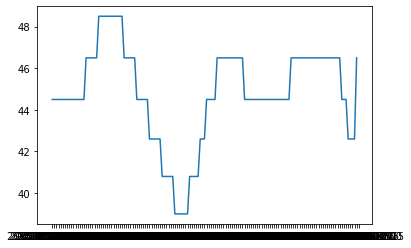

In [7]:
# Plot 1
# inputs: x values, y values
plt.plot(gauge_data['datetime'], gauge_data['Discharge'])

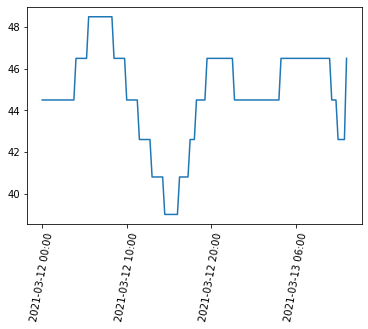

In [8]:
# Plot 2
# inputs: x values, y values
plt.plot(gauge_data['datetime'], gauge_data['Discharge'])

ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(5))  # Use only 4 labels
ax.tick_params(axis='x', labelrotation = 80)  # Rotate the labels so the are more vertical

### Optional Extra: A pandas-specific way to plot

This plotting method is faster but only works for pandas dataframes.  The benefit is that you get the lagend automatically.

<AxesSubplot:xlabel='datetime'>

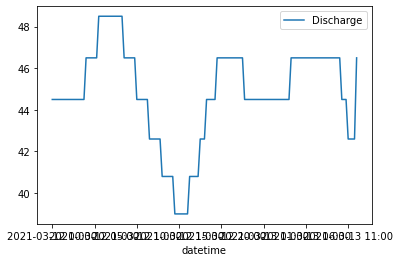

In [9]:
# Plot 1
# inputs: x column name, y column name
gauge_data.plot('datetime', 'Discharge')

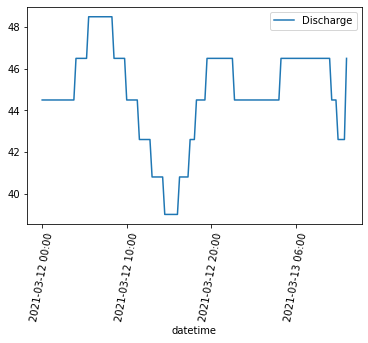

In [10]:
# Plot 2
# inputs: x column name, y column name
gauge_data.plot('datetime', 'Discharge')

ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(5))  # Use only 4 labels
ax.tick_params(axis='x', labelrotation = 80)  # Rotate the labels so the are more vertical

## 3) Cumulative sum

###  Subtracting the mean value as a baseline

In Raphe's examples the mean value of a large value was used as the baseline and then used to compute the anomaly of each value.  Here we use the mean of our dataset (even though the record isn't that long, hopefully it conveys the idea).

In [11]:
baseline_discharge = gauge_data['Discharge'].mean()

In [12]:
gauge_data['discharge_anomaly'] = gauge_data['Discharge'] - baseline_discharge

In [13]:
gauge_data['discharge_anomaly']

0     -0.304138
1     -0.304138
2     -0.304138
3     -0.304138
4     -0.304138
         ...   
141   -2.204138
142   -2.204138
143   -2.204138
144    1.695862
145         NaN
Name: discharge_anomaly, Length: 146, dtype: float64

### Compute the cumulative sum

In [14]:
import numpy as np

In [15]:
# inputs: the data variable you want to sum
discharge_csum = np.cumsum(gauge_data['discharge_anomaly'])

In [16]:
discharge_csum

0     -3.041379e-01
1     -6.082759e-01
2     -9.124138e-01
3     -1.216552e+00
4     -1.520690e+00
           ...     
141    2.712414e+00
142    5.082759e-01
143   -1.695862e+00
144   -2.003731e-12
145             NaN
Name: discharge_anomaly, Length: 146, dtype: float64

### Plot the cumulative sum

In [17]:
import matplotlib.pyplot as plt

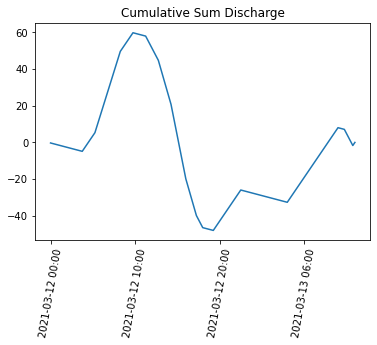

In [18]:
plt.title('Cumulative Sum Discharge')
# inputs: x values, y values
plt.plot(gauge_data['datetime'], discharge_csum)

ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(5))  # Use only 4 labels
ax.tick_params(axis='x', labelrotation = 80)  # Rotate the labels so the are more vertical

## Kendall's Tau

[docs page](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html)

In [19]:
from scipy import stats

In [20]:
# inputs: variable 1, variable 2, (OPTIONAL nan_policy if your dataset has nan values)
tau, p_value = stats.kendalltau(gauge_data['Discharge'], gauge_data['pH'], nan_policy='omit')
print('tau: ', tau, ' p_value: ', p_value)

tau:  -0.5386593699749752  p_value:  1.19439882810134e-14


### Scatter plot of the Discharge and pH

Text(0.5, 1.0, 'pH vs. Discharge')

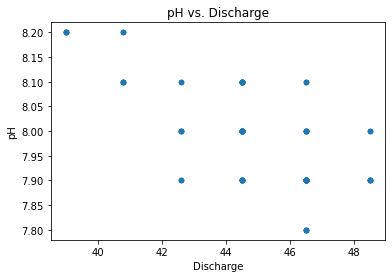

In [21]:
gauge_data.plot.scatter('Discharge', 'pH')
plt.title('pH vs. Discharge')

## Theil Sen Estimator


[docs page](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.theilslopes.html#scipy.stats.theilslopes)

In [22]:
from scipy import stats

**If needed** drop rows with nans

In [23]:
gauge_data = gauge_data.dropna(subset=['Discharge', 'pH'])

Compute the slope values for the best fit line and confidence interval lines.

Output `res` returns four values:
1. slope of the Theil line
2. intercept of the Theil line
3. slope of lower bound of confidence on the Theil line
4. slope of upper bound of confidence on the Theil line

In [24]:
# inputs are: y variable, x variable, confidence interval (value between 0 and 1)
res = stats.theilslopes(gauge_data['pH'], gauge_data['Discharge'], 0.90)
# Here I used the index as a replacement for time
print(res)

(-0.02702702702702691, 9.202702702702698, -0.03636363636363624, -0.02564102564102556)


### Plot the lines

In [25]:
import matplotlib.pyplot as plt

Use the slope and y intercept values from the `stats.theilslopes()` method and plot the lines using the form _y = b + m*x_

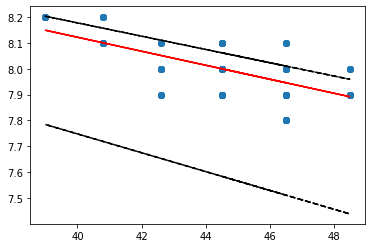

In [26]:
# Inputs for all plots: x values, y values, (optional color preferences)
# base scatter plot
plt.scatter(gauge_data['Discharge'], gauge_data['pH'])
# Theil slope
plt.plot(gauge_data['Discharge'], res[1] + res[0]*gauge_data['Discharge'], color='red')
# lower confidence line
plt.plot(gauge_data['Discharge'], res[1] + res[2]*gauge_data['Discharge'], '--k')
# upper confidence line
plt.plot(gauge_data['Discharge'], res[1] + res[3]*gauge_data['Discharge'], '--k')

More color preferences for the plot are listed in the "Notes" section of the [`plt.plot` docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).